# Python数据可视化：认识matplotlib

一图胜千言，使用Python的matplotlib库，可以快速创建高质量的图形。

用matplotlib生成基本图形非常简单，只需要几行代码，但要创建复杂的图表，需要调用更多的命令和反复试验，这要求用户对matplotlib有深入的认识。

蜂鸟数据推出一个新的系列教程：Python数据可视化，针对初级和中级用户，将理论和示例代码相结合，分别使用matplotlib, seaborn, plotly等工具实现可视化。首先从matplotlib开始。

本文将介绍matplotlib的绘图基础。

## 1. matplotlib层次结构

学习matplotlib，首先要掌握一个核心概念：matplotlib的对象层次结构。

如果您曾经使用过matplotlib，则可能调用过类似plt.plot([1,2,3])这样的函数。这种调用隐藏了一个事实，即图表实际上是嵌套的Python对象的层次结构。这里的“层次结构”意味着每个图下面都有matplotlib对象的树状结构。

如下图所示，Figure对象是matplotlib图形最外层的容器，其中包含一个或多个Axes对象。您可以将Figure对象理解为一个盒型容器，封装了数据，几何图形和样式。Axes对象包含较小的对象，例如刻度线(xaxis/yaxis)，行坐标/列坐标(xaxis/yaxis)，图例(legend)和标题(title)等。所有这些图形元素都是可操作的python对象。

![matplotlib structure](./matplotlib_structure.jpg)

## 2. 样式

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# 在jupyter notebook展示图表
%matplotlib inline

matplotlib提供了很多内置样式(style)，也称为主题(theme)，它们可以帮助用户快速创建美观的图形。

In [2]:
# 查看有哪些内置样式
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

在接下来的教程中，我们会尝试不同的主题，首先选择'ggplot'，它会实现R语言ggplot2的效果。

In [3]:
plt.style.use("ggplot")

## 3. 两种绘图接口

Matplotlib提供两种绘图接口：有状态(stateful)和无状态(stateless)。在创建图形前，我们需要理解这两种方法的关联和差异。

### 3.1 有状态(stateful)接口

上面我们导入了matplotlib.pyplot，并重命名为plt(通用简称)，plt子模块封装了非常多的绘图函数，例如plt.plot(), plt.title(), plt.legend()等等。具体有哪些函数，参考[官方文档](https://matplotlib.org/api/pyplot_summary.html#the-pyplot-api)。

plt绘图函数就是有状态接口，因为它不要求明确地创建Figure和Axes等对象，这些函数会隐式地创建并跟踪这些对象。

接下来创建一幅简单的曲线图，说明这个概念。

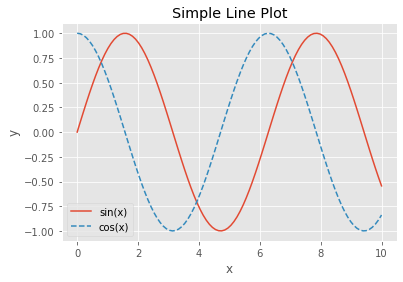

In [4]:
# 准备数据
x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)

# 调用plt的绘图函数，会隐式地创建Figure, Axes对象并跟踪它们
# 先调用plt.plot()映射数据到x轴和y轴
# 然后调用plt.title()等函数添加或修改元素
plt.plot(x, y1, label="sin(x)")  # 添加曲线
plt.plot(x, y2, linestyle="dashed", label="cos(x)")  # 添加曲线
plt.title("Simple Line Plot")  # 添加标题
plt.xlabel("x")  # 添加x轴标签
plt.ylabel("y")  # 添加y轴标签
plt.legend()  # 显示图例

### 3.2 无状态(stateless)接口

无状态接口也被称为面向对象范式，它要求我们先明确创建Figure和Axes等对象，然后调用对象的方法来绘图。

plt.subplots()是创建Figure, Axes对象的最简单方法。

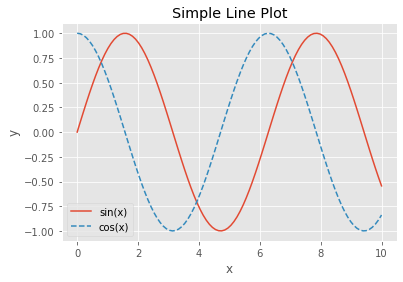

In [5]:
# 明确创建Figure和Axes对象
fig, ax = plt.subplots()

# 查看fig, ax对象类型
# print(type(fig))
# print(type(ax))

# 调用ax对象的方法绘图
ax.plot(x, y1, label="sin(x)")
ax.plot(x, y2, linestyle="dashed", label="cos(x)")
ax.set_title("Simple Line Plot")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend()

通过上面两个简单的示例，大家应该明白两种接口的具体实现，以及它们的区别，这里需要深入探讨一下无状态接口的底层实现原理。

当我们调用plt.plot()或其它绘图函数时，它其实会先调用plt.gcf()和plt.gca()获取最新的Figure和Axes对象，然后再调用这些对象的方法。举个简单的例子，plt.title()会先调用plt.gca()获取“当前”的Axes对象，然后调用ax.set_title()。所以从根本上来说，plt函数只是装饰了面向对象接口，提供一个相对“简单”的方法来绘图。

初学者应该使用哪种方式？由于两种方式并没有根本区别，答案取决于个人偏好，笔者建议使用面向对象的方式，明确创建对象再调用方法，尽管这看上去更加复杂，并要求多写一些代码，但好处在于可以加深对matplotlib层次结构的认识，而且能够创建非常复杂的图形。

## 4. 保存图片

Matplotlib提供了保存图片的接口，这在制作报告时非常有用。

In [6]:
# 调用savefig函数，图片格式为png，此外还可以使用jpg, pdf等
# 调用fig.canvas.get_supported_filetypes()查看支持的格式
fig.savefig("./simple_line_plot.png")

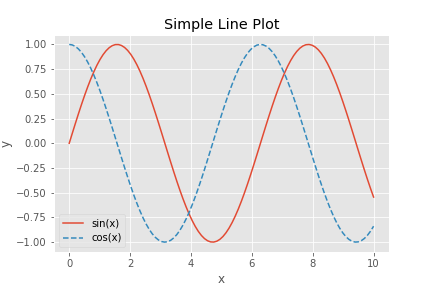

In [7]:
# 重新加载图片，看是否成功
from IPython.display import Image
Image('simple_line_plot.png')

## 5. 结论

本文深入浅出的介绍了matplotlib的基础用法，包括对象层次结构，内置样式，有状态和无状态接口，以及如何保存图片。了解这些基础知识对于熟练掌握matplotlib至关重要。接下来我们将正式进入创作图形的阶段，包括曲线图，柱状图，散点图等。